# Analyzing Star Wars Movies

## Data Exploration 

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding = 
                    "ISO-8859-1")

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
#print data set column labels
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data Cleaning

In [3]:
#clean columns with 'Yes', 'No' and 'NaN' values to boolean values { 'Yes': True, "No": 'False'}

#map to change column to change 'Yes' to True, and 'No' to False
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()) 

bool_map = {'Yes': True, 'No': False}


star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map({"Yes": True, "No": False})
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_map)
    
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()) 
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())


Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [4]:
import numpy as np

#cleaning check box colums (unamed 4 - unamed 8) to boolean values

checkbox_cols = star_wars.columns[3:9]

checkbox_cols_map = {"Star Wars: Episode I  The Phantom Menace": True,"Star Wars: Episode II  Attack of the Clones":True,
               "Star Wars: Episode III  Revenge of the Sith":True,
               "Star Wars: Episode IV  A New Hope":True,
               "Star Wars: Episode V The Empire Strikes Back":True,
               "Star Wars: Episode VI Return of the Jedi":True,
               np.NaN : False}

for u in checkbox_cols:
    
    star_wars[u] = star_wars[u].map(checkbox_cols_map)
    

In [5]:
# rename checkbox columns
updated_col_labels = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
                      "Unnamed: 4":"seen_2",
               "Unnamed: 5":"seen_3",
               "Unnamed: 6":"seen_4",
               "Unnamed: 7":"seen_5",
               "Unnamed: 8":"seen_6"}

star_wars.rename(updated_col_labels, axis = 1, inplace = True)

#print first 5 rows of cleaned and renamed columns
print(star_wars.iloc[:,3:9].head())

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6
0    True    True    True    True    True    True
1   False   False   False   False   False   False
2    True    True    True   False   False   False
3    True    True    True    True    True    True
4    True    True    True    True    True    True


In [6]:
#explore ranking column for cleaning

print(star_wars.iloc[:, 9:15].head())

   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
0                                                3.0                                                                                               
1                                                NaN                                                                                               
2                                                1.0                                                                                               
3                                                5.0                                                                                               
4                                                5.0                                                                                               

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  
0          2.0          1.0          4.0  

In [7]:
#convert ranking columns to numeric type

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#update ranking column labels

rank_cols_map = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
                "Unnamed: 10": "ranking_2",
                "Unnamed: 11": "ranking_3",
                "Unnamed: 12" : "ranking_4",
                "Unnamed: 13": "ranking_5",
                "Unnamed: 14":"ranking_6"}

star_wars.rename(columns = rank_cols_map, inplace = True)


## Data Visualization
## * Determine Highest-Ranked Star Wars Movie

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
ranking_means = star_wars.iloc[:, 9:15].mean()
print(ranking_means)



ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


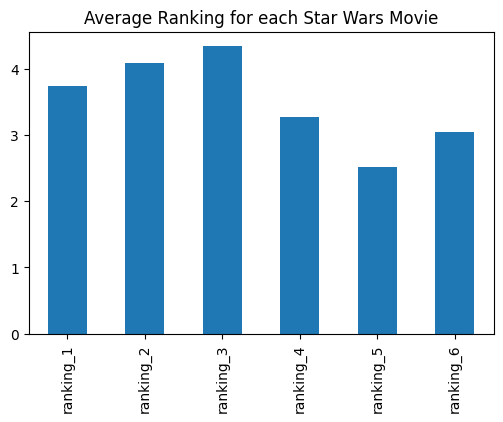

In [9]:
#plot ranking for each movie 

#note that ranking_1 is for movie 'seen_1' - Star Wars: Episode I The Phantom Menace
#ranking_2 is for movie 'seen_2' -Star Wars: Episode II Attack of the Clones
#ranking_3 is for movie 'seen_3' - Star Wars: Episode III Revenge of the Sith
#ranking_4 is for movie 'seen_4' - Star Wars: Episode IV A New Hope
#ranking_5 is for movie 'seen 5' - "Star Wars: Episode V The Empire Strikes Back
#ranking_6 is for movie 'seen_6' -  Star Wars: Episode VI Return of the Jedi

ranking_means.plot.bar( title = 'Average Ranking for each Star Wars Movie')

plt.show()

In [10]:
ranking_desc = pd.DataFrame({"ranking":["ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"], "Movie_Name" :["Star Wars: Episode I The Phantom Menace", "Star Wars: Episode II Attack of the Clones",
                             "Star Wars: Episode III Revenge of the Sith","Star Wars: Episode IV A New Hope",
                              "Star Wars: Episode V The Empire Strikes Back",
                               "Star Wars: Episode VI Return of the Jedi"]})

ranking_desc

,ranking,Movie_Name
0,ranking_1,Star Wars: Episode I The Phantom Menace
1,ranking_2,Star Wars: Episode II Attack of the Clones
2,ranking_3,Star Wars: Episode III Revenge of the Sith
3,ranking_4,Star Wars: Episode IV A New Hope
4,ranking_5,Star Wars: Episode V The Empire Strikes Back
5,ranking_6,Star Wars: Episode VI Return of the Jedi


In [11]:
# plot count number of movie views using the 'seen' columns

viewership_count = star_wars.iloc[:, 3:9].sum()

In [12]:
seen_desc = pd.DataFrame({"Seen":["seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"], "Movie_Name" :["Star Wars: Episode I The Phantom Menace", "Star Wars: Episode II Attack of the Clones",
                             "Star Wars: Episode III Revenge of the Sith","Star Wars: Episode IV A New Hope",
                              "Star Wars: Episode V The Empire Strikes Back",
                               "Star Wars: Episode VI Return of the Jedi"]})

seen_desc

,Seen,Movie_Name
0,seen_1,Star Wars: Episode I The Phantom Menace
1,seen_2,Star Wars: Episode II Attack of the Clones
2,seen_3,Star Wars: Episode III Revenge of the Sith
3,seen_4,Star Wars: Episode IV A New Hope
4,seen_5,Star Wars: Episode V The Empire Strikes Back
5,seen_6,Star Wars: Episode VI Return of the Jedi


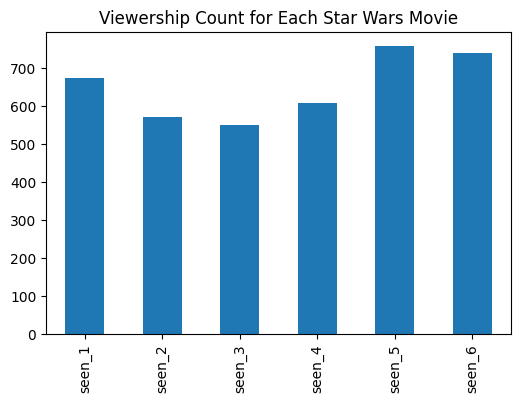

In [13]:
viewership_count.plot.bar(title = "Viewership Count for Each Star Wars Movie")

plt.show()

## Data Visualization Results

**The most highly-ranked movie is 'Star Wars: Episode III Recenge of the Sith'**

**The most viewed movie is 'Star Wars: Episode V The Empire Strikes Back'**

# Data Exploration by Gender- Male or Female


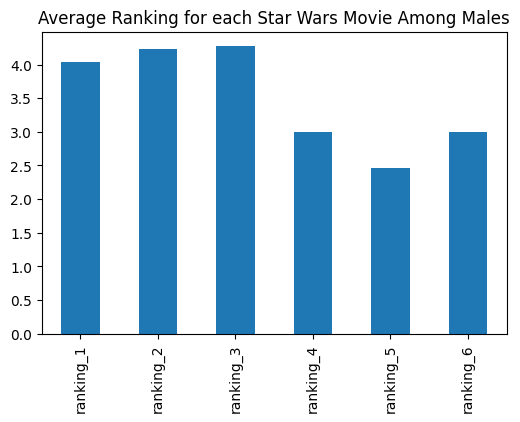

In [14]:
#split dataset for gender, male or female

males = star_wars[star_wars['Gender'] == 'Male']

females = star_wars[star_wars['Gender'] == 'Female']


male_ranking_means = males.iloc[:, 9:15].mean()

male_ranking_means.plot.bar(title ="Average Ranking for each Star Wars Movie Among Males")

plt.show()

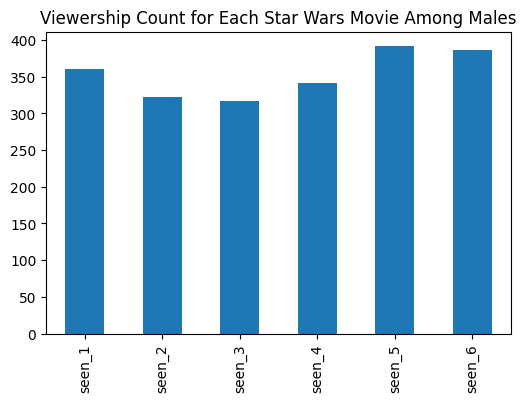

In [15]:
male_viewership_count = males.iloc[:, 3:9].sum()
male_viewership_count.plot.bar(title = "Viewership Count for Each Star Wars Movie Among Males")

plt.show()

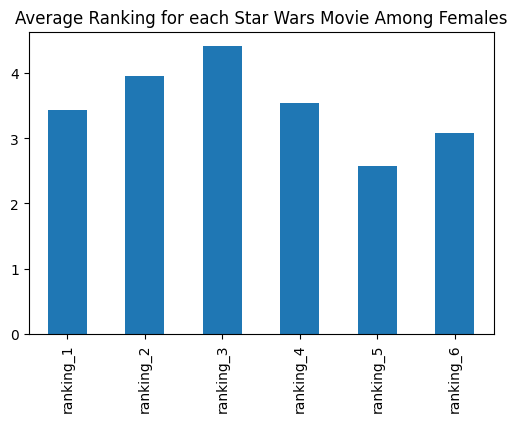

In [16]:
female_ranking_means = females.iloc[:, 9:15].mean()

female_ranking_means.plot.bar(title ="Average Ranking for each Star Wars Movie Among Females")

plt.show()

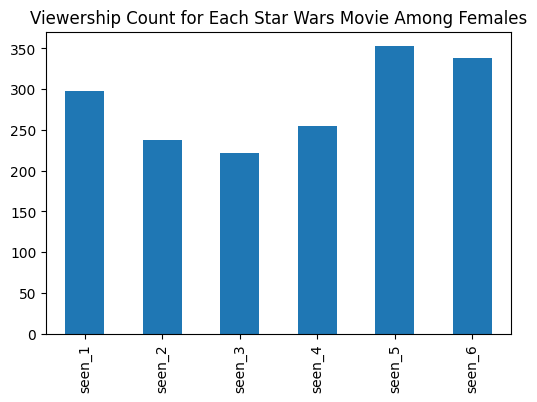

In [17]:
female_viewership_count = females.iloc[:, 3:9].sum()
female_viewership_count.plot.bar(title = "Viewership Count for Each Star Wars Movie Among Females")

plt.show()

## Data exploration by Gender - Results
* **Among Males, the highest ranked movie is 'Star Wars: Episode III Recenge of the Sith', but with a very slight difference with the previous two movies.** 
* **Among females, the highest ranked movie is also 'Star Wars: Episode III Recenge of the Sith', but the difference in ranking with the two previous movies is greater than with males**
* **The most watched movie among both genders is 'Star Wars: Episode V The Empire Strikes Back'.**